In [ ]:
# https://github.com/huggingface/notebooks/blob/main/examples/automatic_mask_generation.ipynb

In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
from PIL import Image
import requests
from transformers import SamModel, SamProcessor
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
import gc

PyTorch version: 2.0.0
Torchvision version: 0.15.1
CUDA is available: True


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()

In [3]:
%%time
generator = pipeline("mask-generation", model="facebook/sam-vit-huge", device=0)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

CPU times: user 9.95 s, sys: 7.23 s, total: 17.2 s
Wall time: 2min 24s


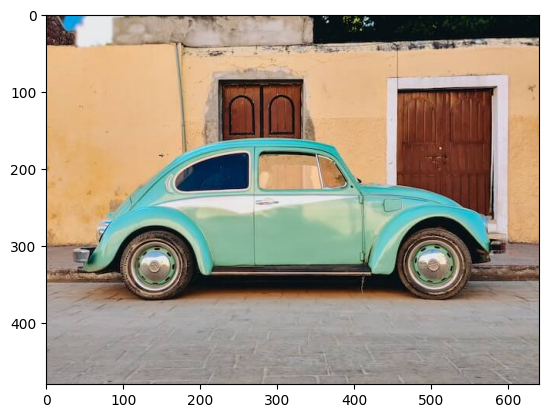

In [4]:
img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

plt.imshow(raw_image)

In [5]:
%%time
outputs = generator(raw_image, points_per_batch=64)

CPU times: user 7.45 s, sys: 484 ms, total: 7.93 s
Wall time: 10.9 s


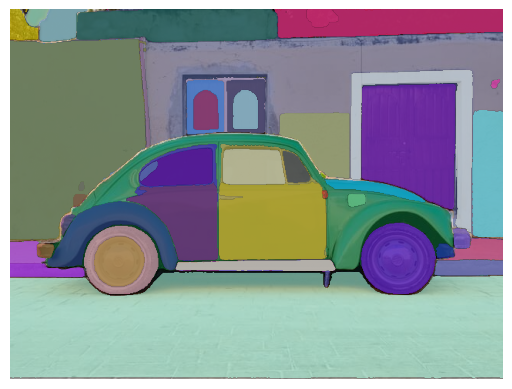

In [6]:
masks = outputs["masks"]
show_masks_on_image(raw_image, masks)

In [7]:
new_image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/depth-estimation-example.jpg"
outputs = generator([raw_image,new_image_url], points_per_batch=64)

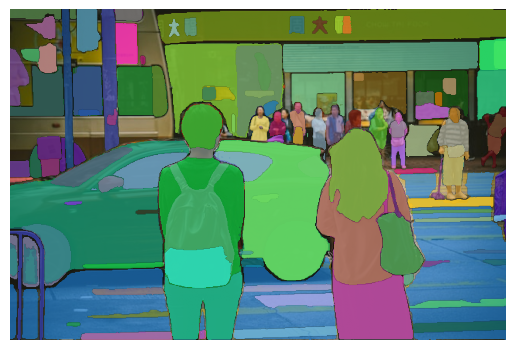

In [8]:
masks = outputs[1]["masks"]
raw_image = Image.open(requests.get(new_image_url, stream=True).raw).convert("RGB")
show_masks_on_image(raw_image, masks)